In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [15]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [37]:
W_analit = np.linalg.solve((X).dot(X.T), (X).dot(y))
W_analit

array([45.0625,  3.8125])

In [38]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [39]:
calc_mse(y, np.dot(W_analit, X))

43.96875

In [77]:
n = X.shape[1]
alpha = 1e-3 
W = np.array([1, 0.5])
W_old = W.copy()
print(f'Number of objects = {n} \
       \nLearning rate (alpha) = {alpha} \
       \nInitial weights (W) = {W}, W.shape = {W.shape}')

Number of objects = 10        
Learning rate (alpha) = 0.001        
Initial weights (W) = [1.  0.5], W.shape = (2,)


In [78]:
for i in range(10001):
    y_pred = np.dot(X.T, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n) * 2 * np.sum(X[k] * (y_pred - y))
    if i % 10 == 0:
        # alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, alpha = {alpha}, MSE = {round(err,4)}, \
weight_dist = {round(np.linalg.norm(W - W_old, ord=2), 6)}')
        W_old = W.copy()

Iteration #0: W_new = [1.108 0.877], alpha = 0.001, MSE = 3047.75, weight_dist = 0.392165
Iteration #10: W_new = [2.0649136  3.97915354], alpha = 0.001, MSE = 1924.9617, weight_dist = 3.246389
Iteration #20: W_new = [2.84562945 6.12938878], alpha = 0.001, MSE = 1367.9296, weight_dist = 2.287581
Iteration #30: W_new = [3.50205949 7.61380338], alpha = 0.001, MSE = 1087.9704, weight_dist = 1.62308
Iteration #40: W_new = [4.07053274 8.63256215], alpha = 0.001, MSE = 943.7706, weight_dist = 1.166632
Iteration #50: W_new = [4.57647571 9.32570753], alpha = 0.001, MSE = 866.1547, weight_dist = 0.858154
Iteration #60: W_new = [5.03768687 9.79121771], alpha = 0.001, MSE = 821.2589, weight_dist = 0.655298
Iteration #70: W_new = [ 5.46662776 10.09764094], alpha = 0.001, MSE = 792.5044, weight_dist = 0.527148
Iteration #80: W_new = [ 5.87202586 10.29293495], alpha = 0.001, MSE = 771.7737, weight_dist = 0.449986
Iteration #90: W_new = [ 6.25999607 10.41065151], alpha = 0.001, MSE = 755.091, weight_d

In [80]:
W

array([45.05791731,  3.813331  ])

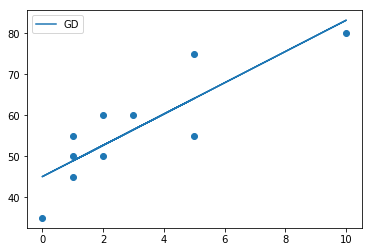

In [79]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred, label='GD')
plt.legend()
plt.show()

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [83]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1001):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
#     W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y))) 
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [98]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
MSE_min_diff = 1e-6
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W}')
# y_pred = np.dot(W, X)
# err = calc_mse(y, y_pred)
MSE_diff = err = np.inf
i = 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 



In [99]:
while MSE_diff > MSE_min_diff:
    old_err = err
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y))) 
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}, MSE_diff = {MSE_diff}')
    MSE_diff = old_err - err
    i += 1

Iteration #10: W_new = [ 6.64172205 10.62940003], MSE = 752.02, MSE_diff = 16.279266503170334
Iteration #20: W_new = [10.02900674 10.16329008], MSE = 632.72, MSE_diff = 11.089208357373309
Iteration #30: W_new = [13.09636548  9.60903915], MSE = 534.14, MSE_diff = 9.232131962446942
Iteration #40: W_new = [15.89487851  9.10159809], MSE = 452.07, MSE_diff = 7.6864164206044165
Iteration #50: W_new = [18.44838865  8.63855875], MSE = 383.75, MSE_diff = 6.399496694867423
Iteration #60: W_new = [20.77834901  8.21605636], MSE = 326.86, MSE_diff = 5.328043096640442
Iteration #70: W_new = [22.90433054  7.83054239], MSE = 279.49, MSE_diff = 4.435980608041575
Iteration #80: W_new = [24.84419078  7.47877865], MSE = 240.06, MSE_diff = 3.6932741717738793
Iteration #90: W_new = [26.61422391  7.15781043], MSE = 207.23, MSE_diff = 3.0749174338511125
Iteration #100: W_new = [28.22929764  6.86494171], MSE = 179.9, MSE_diff = 2.560090798907595
Iteration #110: W_new = [29.70297804  6.59771249], MSE = 157.14, 